In [32]:
import numpy as np
import pandas as pd
import requests
import sklearn.datasets
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [5]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
auto_dataset = pd.read_csv(url)

In [7]:
# This will display the first 5 lines of the dataset
auto_dataset.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [8]:
auto_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   3            204 non-null    int64  
 1   ?            204 non-null    object 
 2   alfa-romero  204 non-null    object 
 3   gas          204 non-null    object 
 4   std          204 non-null    object 
 5   two          204 non-null    object 
 6   convertible  204 non-null    object 
 7   rwd          204 non-null    object 
 8   front        204 non-null    object 
 9   88.60        204 non-null    float64
 10  168.80       204 non-null    float64
 11  64.10        204 non-null    float64
 12  48.80        204 non-null    float64
 13  2548         204 non-null    int64  
 14  dohc         204 non-null    object 
 15  four         204 non-null    object 
 16  130          204 non-null    int64  
 17  mpfi         204 non-null    object 
 18  3.47         204 non-null    object 
 19  2.68    

In [14]:
auto_dataset['5000'].value_counts()

5500    37
4800    36
5000    26
5200    23
5400    13
6000     9
5800     7
4500     7
5250     7
4150     5
4200     5
4750     4
4350     4
4400     3
5900     3
5100     3
4250     3
?        2
6600     2
5300     1
5600     1
5750     1
4900     1
4650     1
Name: 5000, dtype: int64

In [9]:
auto_dataset['convertible'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     5
Name: convertible, dtype: int64

In [10]:
auto_dataset.describe()

,3,88.60,168.80,64.10,48.80,2548,130,9.00,21,27
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.823529,98.806373,174.075000,65.916667,53.749020,2555.602941,126.892157,10.148137,25.240196,30.769608
std,1.239035,5.994144,12.362123,2.146716,2.424901,521.960820,41.744569,3.981000,6.551513,6.898337
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.075000,52.000000,2145.000000,97.000000,8.575000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.200000,66.900000,55.500000,2939.250000,142.000000,9.400000,30.000000,34.500000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


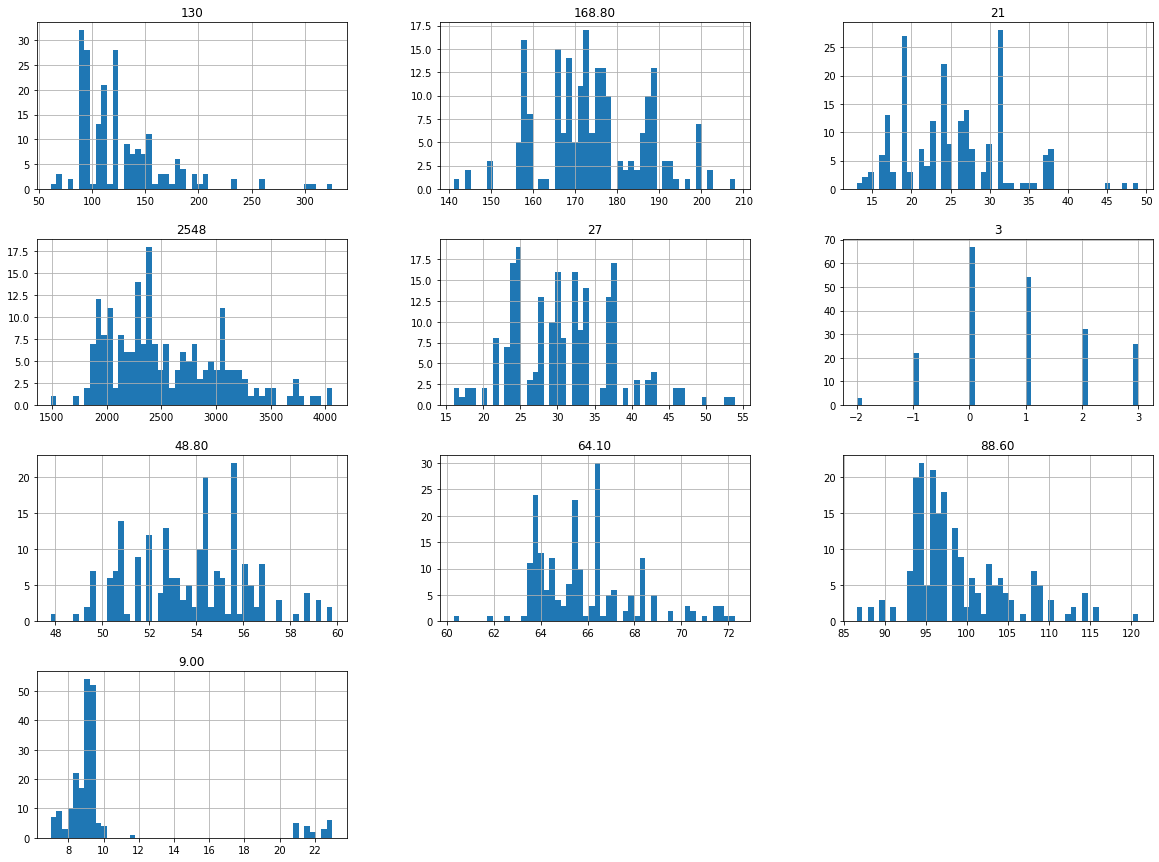

In [15]:
%matplotlib inline
auto_dataset.hist(bins=50, figsize=(20,15))
plt.show()

In [16]:
# Creting a test set
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) 
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size] 
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [18]:
train_set, test_set = split_train_test(auto_dataset, 0.2)
print(len(train_set), "train +", len(test_set), "test")

164 train + 40 test


In [24]:
train_set.head()

,index,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,3,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,6,1,?,audi,gas,std,four,wagon,fwd,front,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920


In [30]:
test_set.head()

,index,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,mpfi,3.47,2.68,9.00,111,5000,21,27,13495,id
4,4,2,?,audi,gas,std,two,sedan,fwd,front,...,mpfi,3.19,3.40,8.50,110,5500,19,25,15250,audiaudiaudiaudiaudiaudiaudiaudiaudiaudiaudiau...
5,5,1,158,audi,gas,std,four,sedan,fwd,front,...,mpfi,3.19,3.40,8.50,110,5500,19,25,17710,audiaudiaudiaudiaudiaudiaudiaudiaudiaudiaudiau...
11,11,0,188,bmw,gas,std,two,sedan,rwd,front,...,mpfi,3.31,3.19,9.00,121,4250,21,28,20970,bmwbmwbmwbmwbmwbmwbmwbmwbmwbmwbmwbmwbmwbmwbmwb...
20,20,1,118,dodge,gas,std,two,hatchback,fwd,front,...,2bbl,2.97,3.23,9.41,68,5500,37,41,5572,dodgedodgedodgedodgedodgedodgedodgedodgedodged...
23,23,1,148,dodge,gas,std,four,hatchback,fwd,front,...,2bbl,2.97,3.23,9.40,68,5500,31,38,6229,dodgedodgedodgedodgedodgedodgedodgedodgedodged...


In [34]:
"""
Implemting the pocket algorithm

I will use the code I created when I implemented the PLA model, however, this time I will make sure to add the
Pocket algorith to it. 
"""

'\nImplemting the pocket algorithm\n\nI will use the code I created when I implemented the PLA model, however, this time I will make sure to add the\nPocket algorith to it. \n'

In [47]:
class Perceptron():
    """
    This class is meant to implement the Perceptron algorithm 
    """
    def __init__(self, x_train, y_train, sigma=1, iterations=10, w=[0]):
        """
        The perceptron will take in as paramerers.
        x_train
        y_train
        iterations: the defualt value is 10
        """
        self.x_train = x_train
        self.y_train = y_train
        self.w = np.zeros(len(self.x_train[0]))
        self.iterations = iterations
        self.sigma = sigma # Learning Algorithm
        self.counter = 0
        # this vector will be used for predictions when I am testing
        self.y_est_vector = np.ones(len(self.y_train))
        self.errors = np.ones(len(self.y_train))  # error vector
        self.sse = []  # vector for the SSE
        
    def perceptron_train(self):
        """
        The function will use the data that was input when the Perceptron
        object was created. 
        return: the correct weights that will separate the linear data.
        """
        min_error = 99999
        while self.counter < self.iterations:
            for i in range(0, len(self.x_train)):
                h = self.w.dot(self.x_train[i])
                if h >= 0:
                    y_estimate = 1
                else:
                    y_estimate = 0
                self.y_est_vector[i] = y_estimate
                # update weights after calculating h. The weights may or may
                # not change depening on the value of h
                for k in range(0, len(self.w)):
                    self.w[k] = self.w[k] + (self.y_train[i] - y_estimate) * self.x_train[i][k]

            for i in range(0, len(self.y_train)):
                self.errors[i] = (self.y_train[i] - self.y_est_vector[i]) ** 2
            error = 0.5*np.sum(self.errors)
            if error < min_error:
                min_error = error
            self.sse.append(min_error)
            
            self.counter += 1
        return (self.w, self.sse)

    def perceptron_test(self, x_test_data, w_ret, y_test):
        """
        Function that will test the results using the returned weigts and the 
        test_data
        return the predicted values of the output
        """
        y_prediction = []
        errors = np.ones(len(y_test))
        min_error = 99999
        sse_t = []
        for i in range(0, len(x_test_data)):
            h_prediction = w_ret.dot(x_test_data[i])
            if h_prediction >= 0:
                y_estimate = 1
            else:
                y_estimate = 0

            y_prediction.append(y_estimate)
            
        for i in range(0, len(x_test)):
                errors[i] = (y_test[i] - y_prediction[i]) ** 2
        error = 0.5*np.sum(errors)
        if error < min_error:
            min_error = error
        sse_t.append(min_error)
       
        return y_prediction, sse_t

### function that will shuffle the data
def shuffle_data(dataset, data_points, random_seed = 5):
    """ 
    This static function will shuffle my data
    Parameters:
        Dataset
        how many data points
        default random_seed = 5 to shuffle the data
    """
    dataset = dataset.iloc[:data_points]
    dataset = dataset.values
    np.random.seed(random_seed)
    np.random.shuffle(dataset)
    dataset = np.c_[np.ones(len(dataset)), dataset]
    return dataset 

#### function will return the testing and training data needed for PLA ###
def train_test_data(shuffled_data, grab_columns, percent_train=0.8, percent_test=0.2):
    """
    This static fucntion will return the training and testing sets
    Parameters:
        processed_data --> selected inouts and outputs including the amount of data points
        grab_columns --> the columns you want to include from the shuffled data
        percent_train --> 0 to 1 value: default is 0.8
        percent_test --> 0 to 1 value: default is 0.2
    return x_train, y_train, x_test, y_test
    """
    train = shuffled_data[:int(percent_train*len(shuffled_data)), grab_columns]
    test = shuffled_data[int(-percent_test*len(shuffled_data)):, grab_columns]
    
    x_train,y_train,x_test,y_test = train[:, :len(grab_columns) - 1], train[:, len(grab_columns) - 1], \
                                    test[:, :len(grab_columns) - 1], test[:, len(grab_columns) - 1]
    
    return (x_train, y_train, x_test, y_test)

### function that will generate nonlinear random data points
def nonlinear_data(seed=15, samples=50):
    # generate random samples
    nums = 30 * np.random.random(samples)
    nums_greater_than_20 = nums > 18
    # nums greater than 18 times them by 1.3
    nums[nums_greater_than_20] *= 1.3
    # nums less than 18 times them by 1.3
    nums[~nums_greater_than_20] *= 1.2

    theta = np.random.random(samples) * np.pi * 2
    
    # creates an empty array of size samples by 2
    x = np.empty((samples, 3))
    # replace the values in x using nums vector and theta 
    # to get positve and negative values
    x[:, 0] = nums * np.cos(theta)
    x[:, 1] = nums * np.sin(theta)
    
    y_values = np.ones(samples)
    y_values[nums_greater_than_20] = -1
    x[:,2] = y_values
    return x

The accuracy of the model is:  0.25
The final weights are:  [-248.         -183.93666308    4.66269005]
SSE Train Cost
[49.5, 46.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5, 45.5]
SSE Test Cost
[13.5]


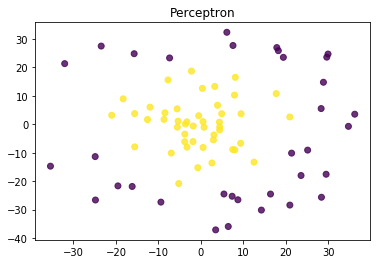

In [48]:
if __name__ == "__main__":
    # I will create random sampels 
    data = pd.DataFrame(nonlinear_data(15, 100))
    
    # I will be using the first 100 data points from iris_data
    data_test = shuffle_data(data, 100)
    # I will input iris_test (shuffled data) and columns 0,2,4,5
    x_train, y_train, x_test, y_test = train_test_data(data_test, [0, 1, 2, 3])
   
    data_model = Perceptron(x_train, y_train, 100)
    w, sse = data_model.perceptron_train()
    y_pred, sse_test = data_model.perceptron_test(x_test, w, y_test)
    print("The accuracy of the model is: ", accuracy_score(y_test, y_pred))
    print("The final weights are: ", w)
    print("SSE Train Cost")
    print(sse)
    print("SSE Test Cost")
    print(sse_test)
    
    # Simple plot that shous the linearly seperable data.
    plt.scatter(x_train[:,1], x_train[:,2], c = y_train,alpha=0.8) 
    plt.title("Perceptron")